In [37]:
from create_data_set import create_data_set
import pandas as pd

f_name  = f'/home/hadasabraham/SignalCluster/data/datasets/hadas_adir_barak_train.csv'
# create_data_set(f_name, 20, 2, False)
col_names = ['signal', 'barcode']
data = pd.read_csv(f_name, index_col=0)
# data.columns = col_names
X = data['signal']
Y = data['barcode']
data.head()

,signal,barcode
0,"[475, 476, 448, 428, 425, 447, 421, 456, 431, ...",CCCTTAAGAGGGAC
1,"[718, 469, 460, 457, 459, 414, 430, 424, 441, ...",CCCTTAAGAGGGAC
2,"[662, 392, 386, 401, 378, 395, 386, 383, 369, ...",CCCTTAAGAGGGAC
3,"[465, 473, 463, 463, 464, 462, 459, 462, 487, ...",CCCTTAAGAGGGAC
4,"[494, 465, 440, 451, 447, 432, 458, 436, 442, ...",CCCTTAAGAGGGAC


In [38]:
import numpy as np
def clean_data(array, desired_length):

    if len(array) > desired_length:
        array = array[:desired_length]
    else:
        padding_length = desired_length - len(array)
        array = np.pad(array, (0, padding_length), mode='constant')
    return array
X = X.apply(eval).apply(np.array)
# X = X.apply(lambda x: clean_data(x,3000))

X.head()

0    [475, 476, 448, 428, 425, 447, 421, 456, 431, ...
1    [718, 469, 460, 457, 459, 414, 430, 424, 441, ...
2    [662, 392, 386, 401, 378, 395, 386, 383, 369, ...
3    [465, 473, 463, 463, 464, 462, 459, 462, 487, ...
4    [494, 465, 440, 451, 447, 432, 458, 436, 442, ...
Name: signal, dtype: object

In [39]:
X = X.apply(lambda x: clean_data(x,3000))

X.head()

0    [475, 476, 448, 428, 425, 447, 421, 456, 431, ...
1    [718, 469, 460, 457, 459, 414, 430, 424, 441, ...
2    [662, 392, 386, 401, 378, 395, 386, 383, 369, ...
3    [465, 473, 463, 463, 464, 462, 459, 462, 487, ...
4    [494, 465, 440, 451, 447, 432, 458, 436, 442, ...
Name: signal, dtype: object

In [42]:
y_signals = list(Y)
y_signals2 = list(set(y_signals))
# Example names vector (should have 20 names)
class_number = [i for i in range(20)]
y_signals=[class_number[y_signals2.index(x)] for x in y_signals]
y_train_np = np.array(y_signals).astype(np.int)

y_train_np

/tmp/ipykernel_1720819/4227497742.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_train_np = np.array(y_signals).astype(np.int)


array([9, 9, 9, ..., 0, 0, 0])

In [27]:
from sklearn.model_selection import train_test_split
# separate to train, test
seed = 211

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

# seprate to test, validation 
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.33, random_state=seed)
print(f"Train size: {x_train.shape[0]}")
print(f"Val size: {x_val.shape[0]}")
print(f"Test size: {x_test.shape[0]}")

Train size: 4172
Val size: 591
Test size: 1197


In [43]:
y_train_np = np.array([class_number[y_signals2.index(x)] for x in y_train]).astype(np.int)
y_test_np = np.array([class_number[y_signals2.index(x)] for x in y_test]).astype(np.int)
y_val_np = np.array([class_number[y_signals2.index(x)] for x in y_val]).astype(np.int)
y_train_np

/tmp/ipykernel_1720819/3834019034.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_train_np = np.array([class_number[y_signals2.index(x)] for x in y_train]).astype(np.int)
/tmp/ipykernel_1720819/3834019034.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release not

array([10,  7,  6, ..., 10, 19, 11])

6361
1061
1601
1691
1755
1803
1844
1884
1918
1950
1984
2019
2052
2089
2128
2176
2226
2290
2394
2573
2943
8798


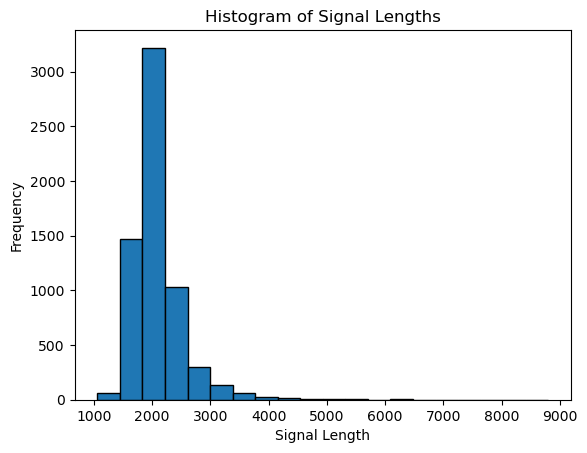

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

f_name  = f'/home/hadasabraham/SignalCluster/data/datasets/hadas_adir_barak_test.csv'

# Read the file and extract signal lengths
signal_lengths = []
batch_signals = pd.read_csv(f_name, index_col='barcode')
batch_signals['signal'] = batch_signals['signal'].apply(eval).apply(np.array)
batch_signals = list(batch_signals['signal'].values)

for signal in batch_signals:
    signal_lengths.append(len(signal))

signal_lengths.sort()
print(len(signal_lengths))

for i in range(0, len(signal_lengths), len(signal_lengths)//20):
    print((signal_lengths[i]))
# Plot the histogram
plt.hist(signal_lengths, bins=20, edgecolor='black')
plt.xlabel('Signal Length')
plt.ylabel('Frequency')
plt.title('Histogram of Signal Lengths')
plt.show()


In [2]:
import numpy as np

def clean_data(arrays, desired_length):
    cleaned_arrays = []
    for array in arrays:
        if len(array) > desired_length:
            cleaned_array = array[:desired_length]
        else:
            padding_length = desired_length - len(array)
            cleaned_array = np.pad(array, (0, padding_length), mode='constant')
        cleaned_arrays.append(cleaned_array)
    return cleaned_arrays

cleaned_arrays = clean_data(batch_signals, desired_length=3000)


In [3]:
import torch
# Reshape the list of arrays into a tensor
tensor = torch.tensor(np.stack(cleaned_arrays))

# Print the shape of the tensor
print(tensor.shape)

/home/hadasabraham/miniconda3/envs/nanopore/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch.Size([6361, 3000])


In [28]:
import numpy as np
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=300).fit_transform(tensor)
X_embedded.shape

(6361, 2)

In [4]:
y_signals = pd.read_csv(f_name)
y_signals = list((y_signals['barcode']))
y_signals2 = list(set(y_signals))
# Example names vector (should have 20 names)
names_vector = ['red', 'blue', 'green', 'orange', 'purple',
                'yellow', 'pink', 'cyan', 'magenta', 'brown',
                'gray', 'lime', 'indigo', 'teal', 'olive',
                'maroon', 'navy', 'salmon', 'gold', 'violet']
y_signals=[names_vector[y_signals2.index(x)] for x in y_signals]


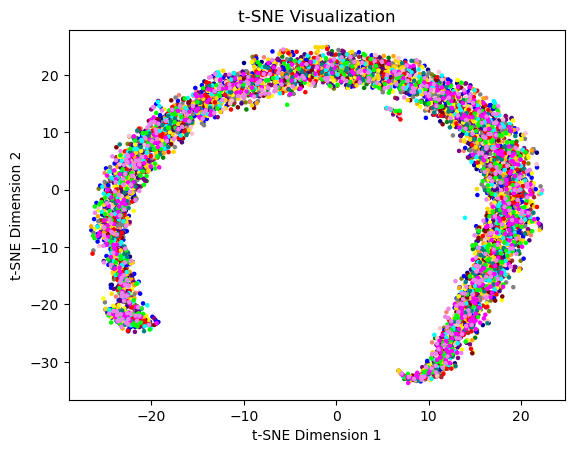

In [29]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_signals, s=5)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization')
plt.show()

PCA time: 3 sec


/tmp/ipykernel_635223/2922604690.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x_pca[:, 0], x_pca[:, 1], c=y_signals, cmap=plt.cm.Spectral, s=5)


KPCA time: 7.9 sec


/tmp/ipykernel_635223/2922604690.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x_kpca[:, 0], x_kpca[:, 1], c=y_signals, cmap=plt.cm.Spectral, s=5)


LLE time: 10 sec


/tmp/ipykernel_635223/2922604690.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x_lle[:, 0], x_lle[:, 1], c=y_signals, cmap=plt.cm.Spectral, s=5)


Isomap time: 34 sec


/tmp/ipykernel_635223/2922604690.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x_lle[:, 0], x_lle[:, 1], c=y_signals, cmap=plt.cm.Spectral, s=5)


t-SNE time: 61 sec


/tmp/ipykernel_635223/2922604690.py:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y_signals, cmap=plt.cm.Spectral, s=5)


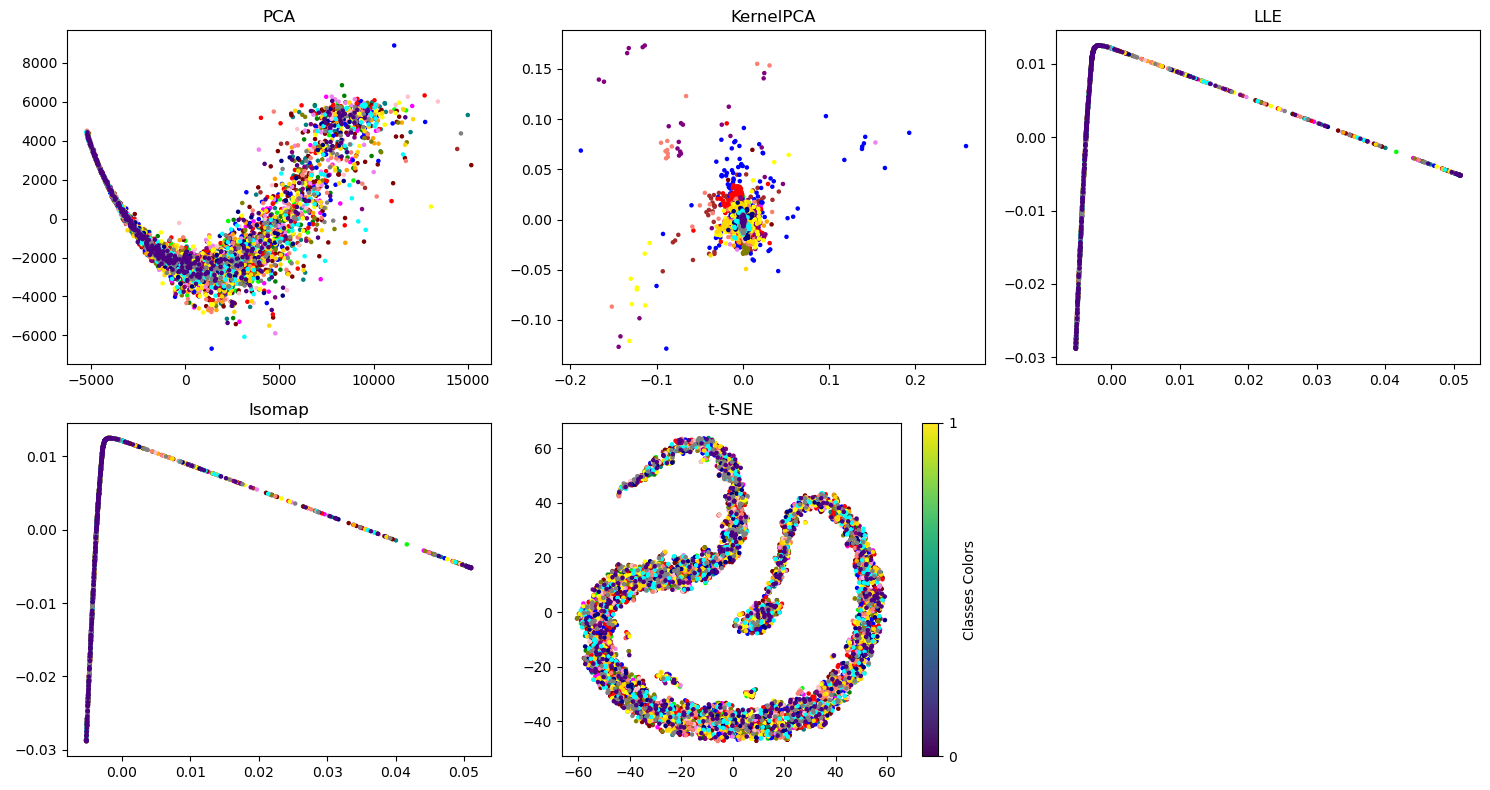

In [11]:
from sklearn.manifold import TSNE, LocallyLinearEmbedding, Isomap
from sklearn.decomposition import PCA, KernelPCA
import time


fig = plt.figure(figsize=(15,8))
n_components= 2
n_neighbors = 10
n_points= 500
# PCA
t0 = time.time()
x_pca = PCA(n_components).fit_transform(tensor)
t1 = time.time()
print("PCA time: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 3, 1)
ax.scatter(x_pca[:, 0], x_pca[:, 1], c=y_signals, cmap=plt.cm.Spectral, s=5)
ax.set_title('PCA')
# KPCA
t0 = time.time()
x_kpca = KernelPCA(n_components, kernel='rbf').fit_transform(tensor)
t1 = time.time()
print("KPCA time: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 3, 2)
ax.scatter(x_kpca[:, 0], x_kpca[:, 1], c=y_signals, cmap=plt.cm.Spectral, s=5)
ax.set_title('KernelPCA')
# LLE
t0 = time.time()
lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, eigen_solver='auto')
x_lle = lle.fit_transform(tensor)
t1 = time.time()
print("LLE time: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 3, 3)
ax.scatter(x_lle[:, 0], x_lle[:, 1], c=y_signals, cmap=plt.cm.Spectral, s=5)
ax.set_title('LLE')
# Isomap
t0 = time.time()
isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components)
x_isomap = isomap.fit_transform(tensor)
t1 = time.time()
print("Isomap time: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 3, 4)
ax.scatter(x_lle[:, 0], x_lle[:, 1], c=y_signals, cmap=plt.cm.Spectral, s=5)
ax.set_title('Isomap')
# t-SNE
t0 = time.time()
x_tsne = TSNE(n_components).fit_transform(tensor)
t1 = time.time()
print("t-SNE time: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 3, 5)
scatter = ax.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y_signals, cmap=plt.cm.Spectral, s=5)
ax.set_title('t-SNE')
bounds = np.linspace(0, 10, 11)
cb = plt.colorbar(scatter, spacing='proportional',ticks=bounds)
cb.set_label('Classes Colors')
plt.tight_layout()